In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

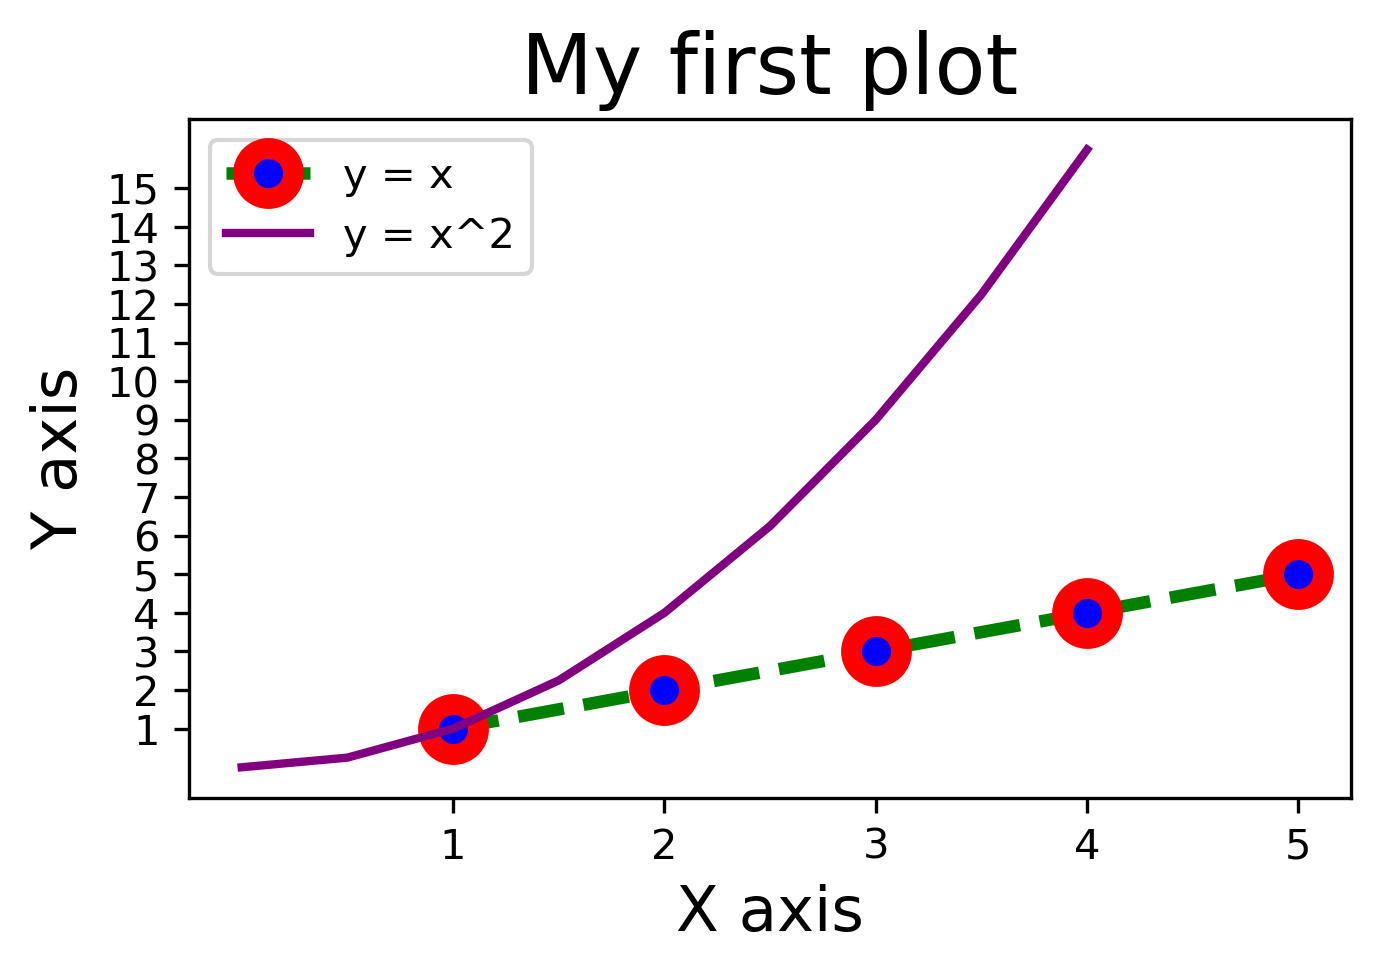

In [37]:
plt.figure(figsize=(5, 3), dpi=300)
plt.plot([1,2,3,4,5], [1,2,3,4,5], color='green', linestyle='--',
         linewidth=3, marker='o', markerfacecolor='blue', markersize=12,
         markeredgewidth=5, markeredgecolor='red', label='y = x')

x2 = np.arange(0, 4.5, 0.5)
plt.plot(x2, x2**2, color='purple', linewidth=2, label='y = x^2')

plt.title('My first plot', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})
plt.xlabel('X axis', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 15})
plt.ylabel('Y axis', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 15})
plt.xticks([1,2,3,4,5])
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.legend()
# dpi 300 is good when saving so graph has high resolution
#plt.savefig('mygraph.png', dpi=300)
plt.show()  # To remove the <matplotlib.figure.Figure at 0x7f8b9c0c4f98> output

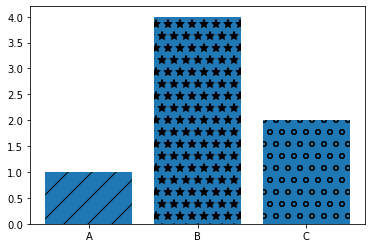

In [47]:
labels = ['A', 'B', 'C']
values = [1, 4, 2]

bars = plt.bar(labels, values)
bars[0].set_hatch('/')
bars[1].set_hatch('*')
bars[2].set_hatch('o')
plt.show()

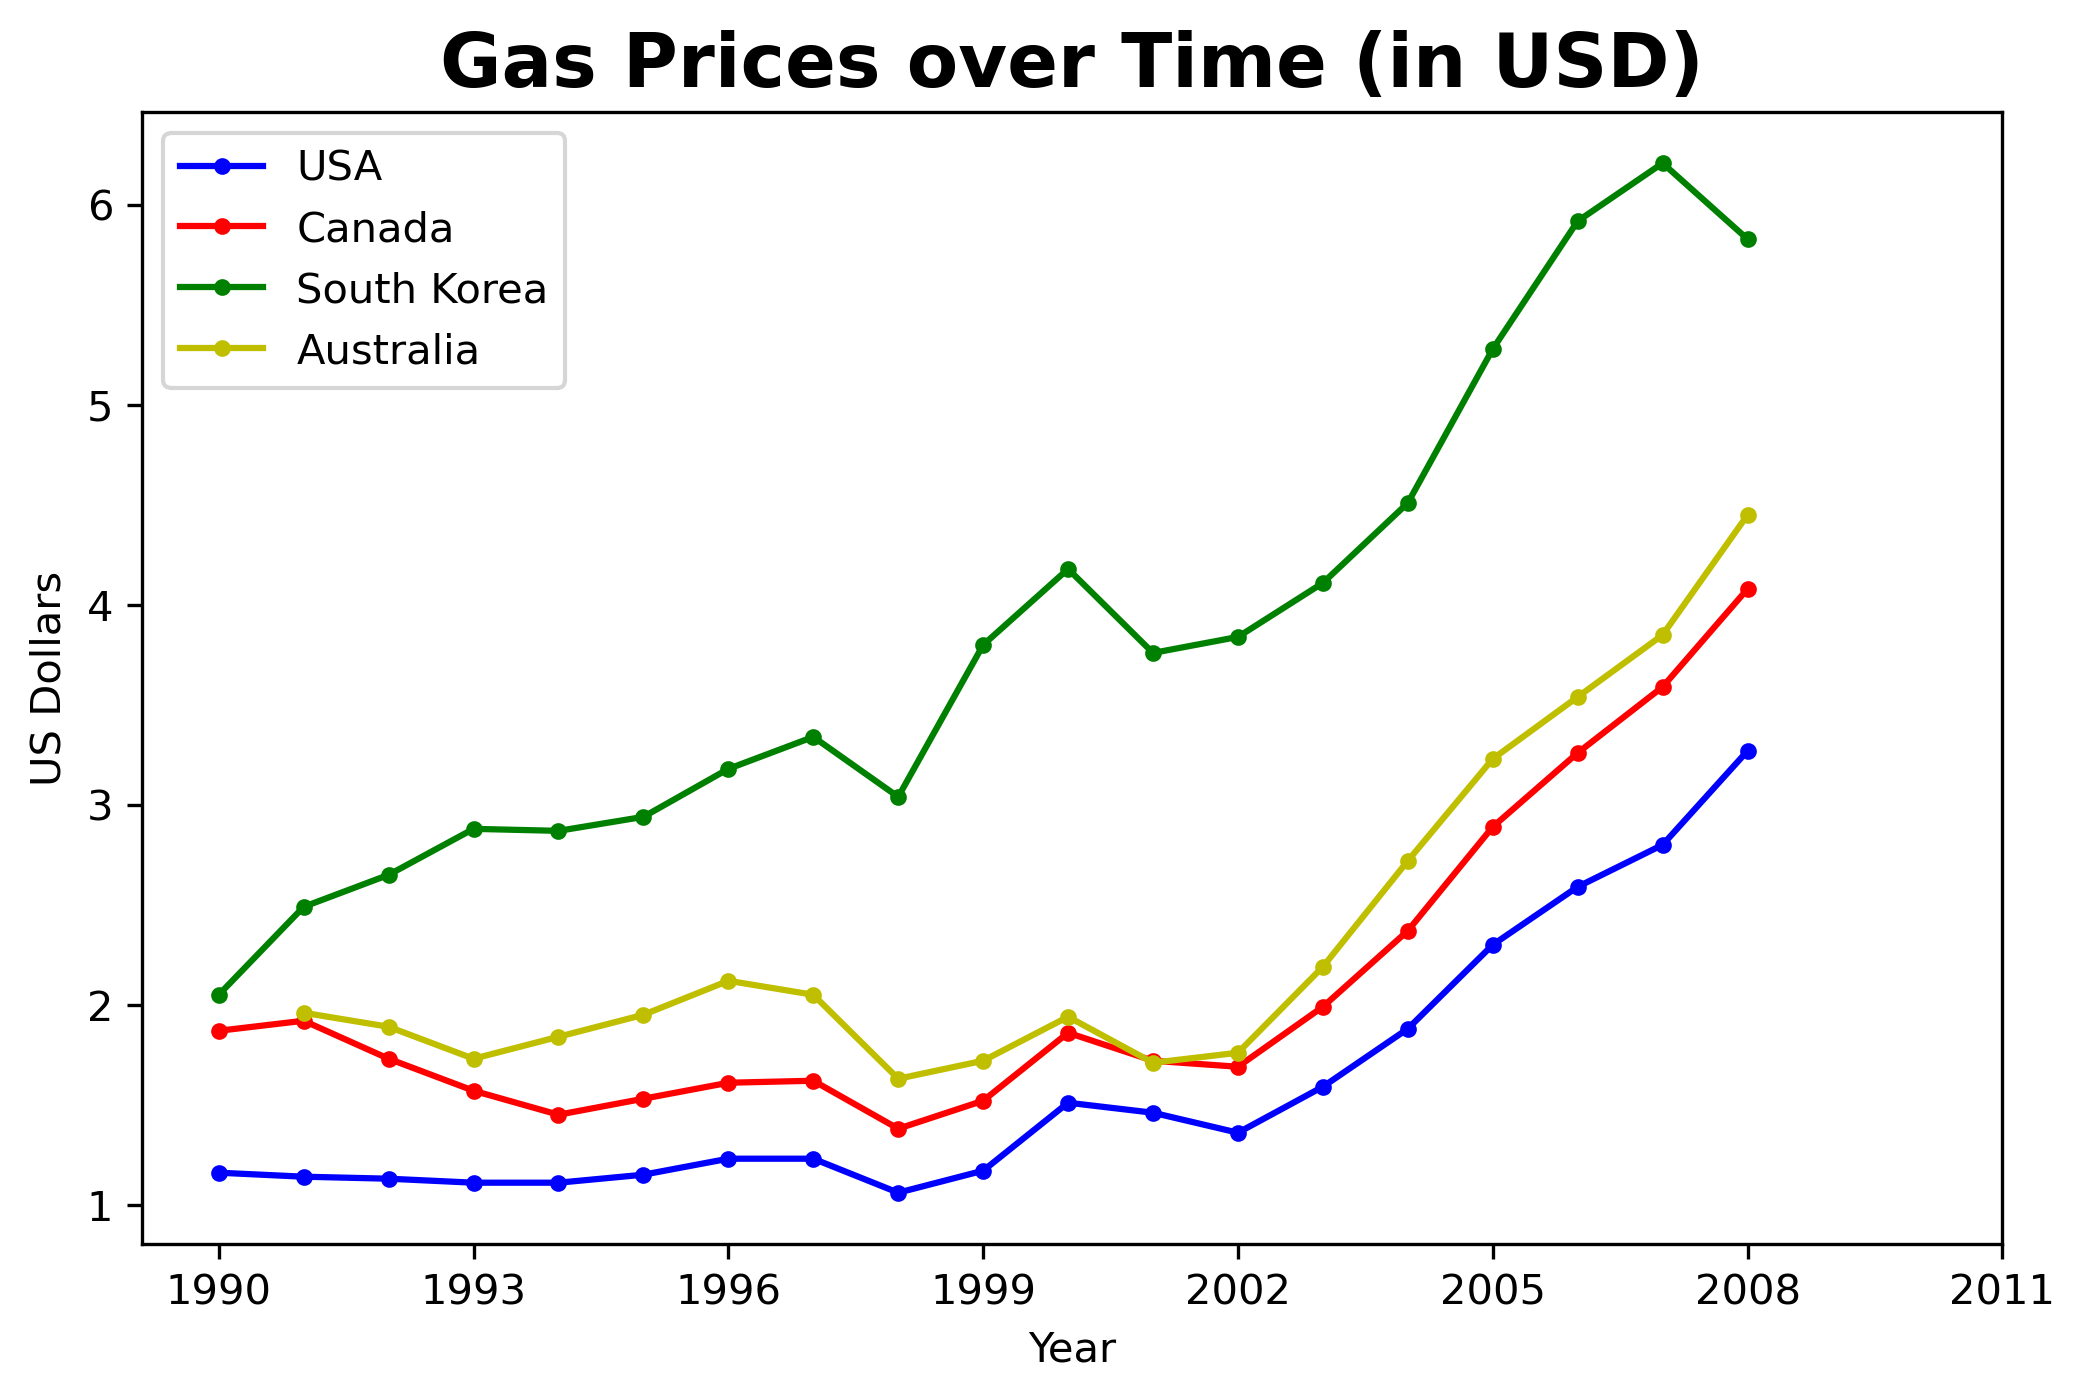

In [53]:
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(8, 5), dpi=300)
plt.plot(gas.Year, gas.USA, 'b.-', label='USA')
plt.plot(gas.Year, gas.Canada, 'r.-', label='Canada')
plt.plot(gas.Year, gas['South Korea'], 'g.-', label='South Korea')
plt.plot(gas.Year, gas.Australia, 'y.-', label='Australia')
plt.title('Gas Prices over Time (in USD)', fontdict={'fontweight': 'bold', 'fontsize': 18})
plt.xlabel('Year')
plt.ylabel('US Dollars')
plt.xticks(gas.Year[::3].tolist() + [2011])
plt.legend()
#plt.savefig('gas_price_figure.png', dpi=300)
plt.show()

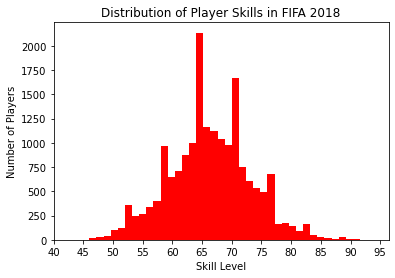

In [59]:
fifa = pd.read_csv('fifa_data.csv')

plt.hist(fifa.Overall, bins=40, color='red')
plt.xticks(range(40, 100, 5))
plt.xlabel('Skill Level')
plt.ylabel('Number of Players')
plt.title('Distribution of Player Skills in FIFA 2018')
plt.show()

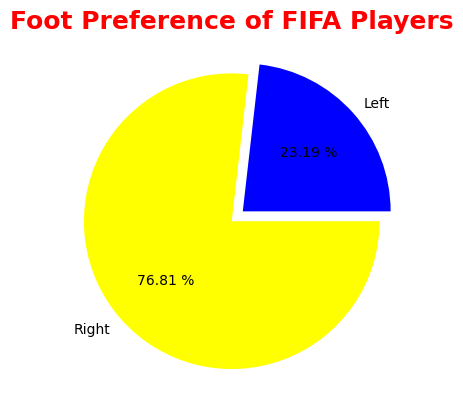

In [78]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]
plt.pie([left, right], labels=['Left', 'Right'], colors=['blue', 'yellow'], autopct='%.2f %%', explode=[0.1, 0])
plt.title('Foot Preference of FIFA Players', fontdict={'fontweight': 'bold', 'fontsize': 18}, color='red')
plt.style.use('ggplot')
plt.show()

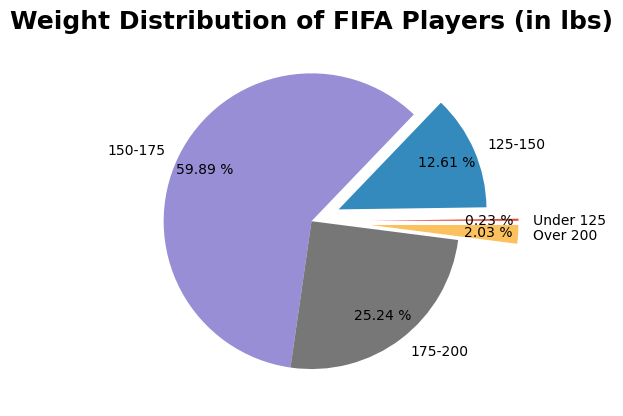

In [77]:
fifa.Weight = [int(x.strip('lbs')) if type(x) == str else x for x in fifa.Weight]
light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa.loc[fifa.Weight >= 200].count()[0]
weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 125', '125-150', '150-175', '175-200', 'Over 200']
explode = (.4, .2, 0, 0, .4)
plt.style.use('ggplot')
plt.title('Weight Distribution of FIFA Players (in lbs)', fontdict={'fontweight': 'bold', 'fontsize': 18})
plt.pie(weights, labels=labels, autopct='%.2f %%', pctdistance=0.8, explode=explode)
plt.show()

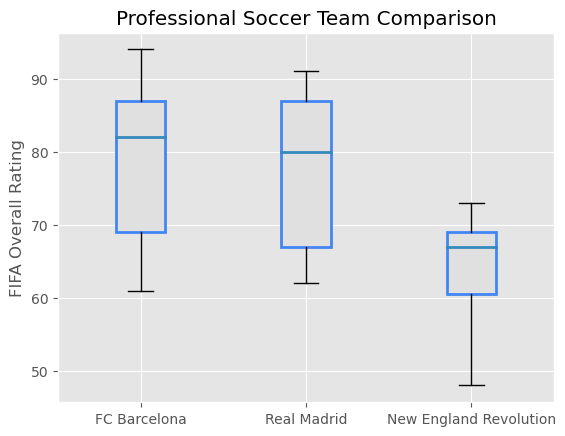

In [81]:
barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
revs = fifa.loc[fifa.Club == 'New England Revolution']['Overall']
labels = ['FC Barcelona', 'Real Madrid', 'New England Revolution']
boxes = plt.boxplot([barcelona, madrid, revs], labels=labels, patch_artist=True, medianprops={'linewidth': 2})
for box in boxes['boxes']:
    # Set edge color
    box.set(color='#4286f4', linewidth=2)
    # Change fill color
    box.set(facecolor='#e0e0e0')
plt.title('Professional Soccer Team Comparison')
plt.ylabel('FIFA Overall Rating')
plt.show()

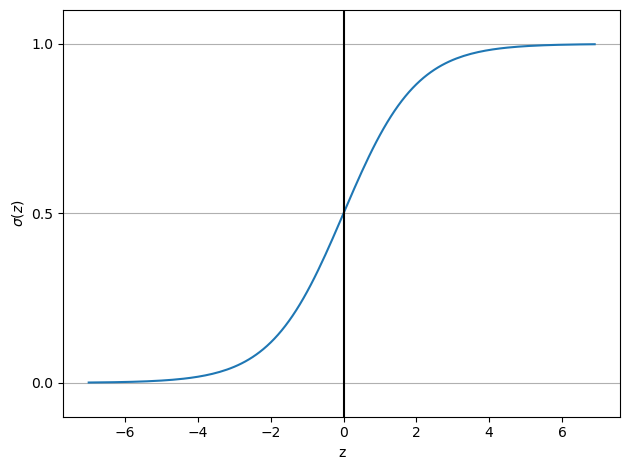

In [7]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
df_wine = pd.read_csv(
'https://archive.ics.uci.edu/ml/'
'machine-learning-databases/wine/wine.data',
header=None
)

In [3]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n', eigen_vals)


Eigenvalues 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


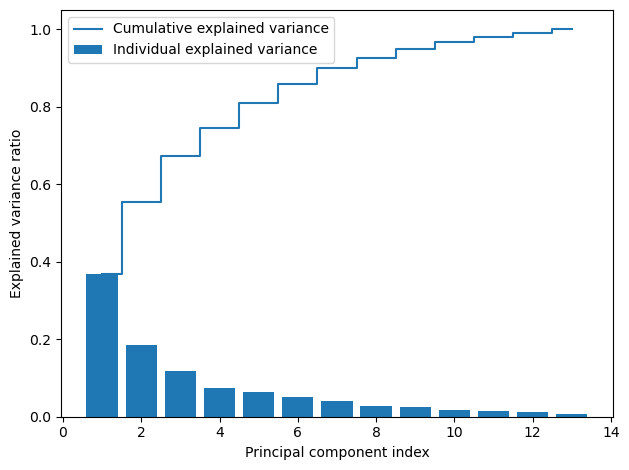

In [5]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
               sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, align='center',
            label='Individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
             label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

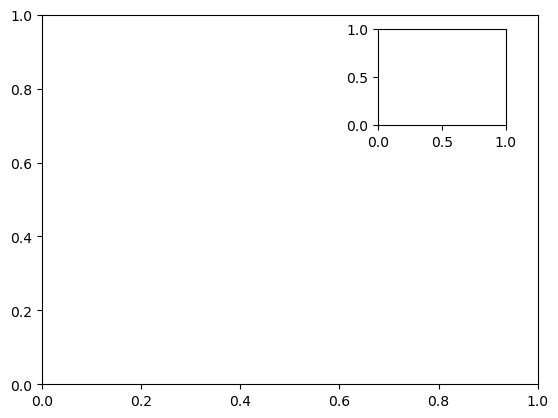

In [3]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

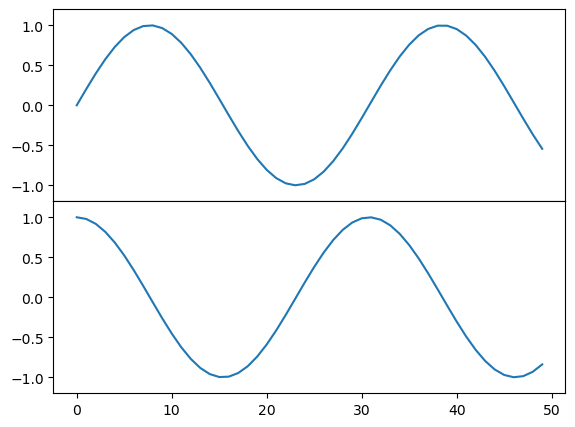

In [4]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

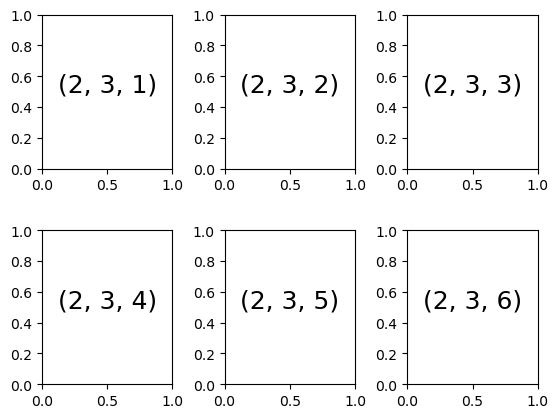

In [7]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

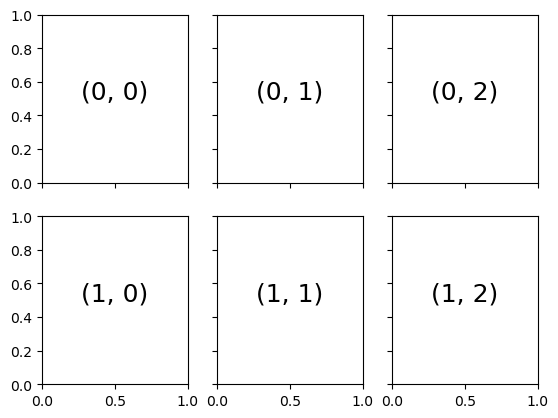

In [9]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')

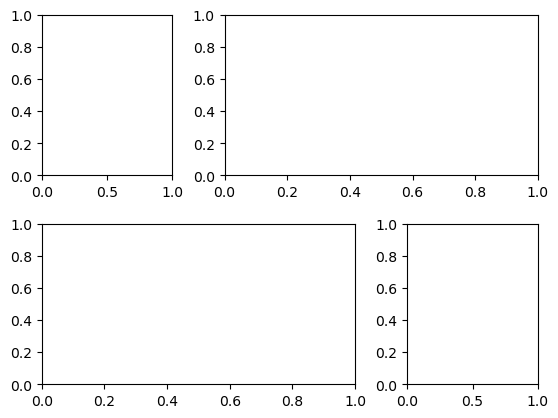

In [10]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

In [11]:
from mpl_toolkits import mplot3d

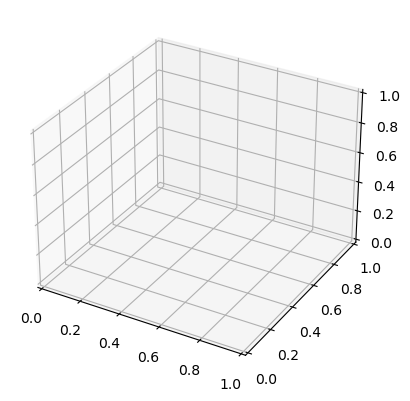

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')

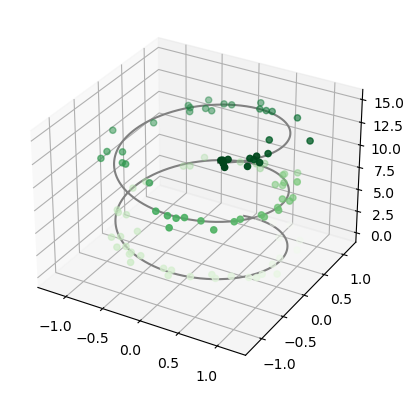

In [13]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

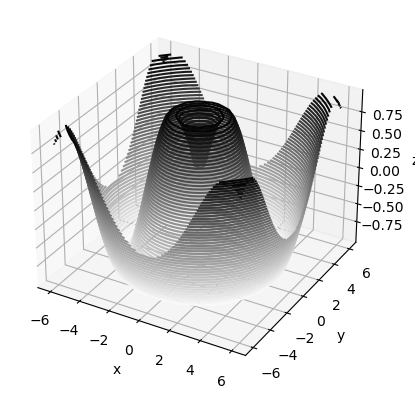

In [14]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

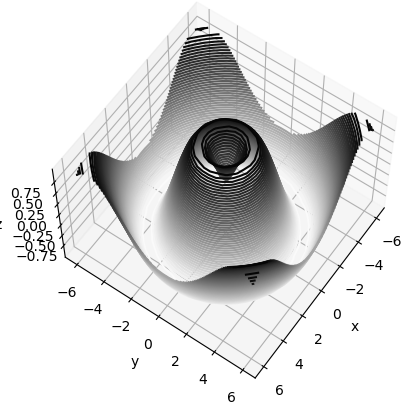

In [15]:
ax.view_init(60, 35)
fig

Resources:
- https://www.youtube.com/watch?v=3Xc3CA655Y4
- https://nbviewer.org/github/TarrySingh/Machine-Learning-Tutorials/blob/master/matplotlib/04.08-Multiple-Subplots.ipynb